# Frequent Pattern Mining

In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('frequent.csv', sep=',')

#df.replace(np.NaN, 'null', inplace = True)

df

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN


In [3]:
items = set()
for c in df:
    items.update(df[c].unique())
    
print(items) #nan -> 'null'

{nan, 'Eggs', 'Milk', 'Diaper', 'Meat', 'Pencil', 'Bread', 'Wine', 'Cheese', 'Bagel'}


In [4]:
items = [x for x in items if not pd.isnull(x)]

print(items)

['Eggs', 'Milk', 'Diaper', 'Meat', 'Pencil', 'Bread', 'Wine', 'Cheese', 'Bagel']


In [5]:
pd.get_dummies(df)

,0_Bagel,0_Bread,0_Cheese,0_Diaper,0_Eggs,0_Meat,0_Milk,0_Pencil,0_Wine,1_Bagel,...,5_Wine,6_Bagel,6_Bread,6_Cheese,6_Diaper,6_Eggs,6_Meat,6_Milk,6_Pencil,6_Wine
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
313,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
x = encoder.fit_transform(df)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
311,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
312,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
313,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
columnNames = encoder.get_feature_names()
columnNames

array(['x0_Bagel', 'x0_Bread', 'x0_Cheese', 'x0_Diaper', 'x0_Eggs',
       'x0_Meat', 'x0_Milk', 'x0_Pencil', 'x0_Wine', 'x1_Bagel',
       'x1_Bread', 'x1_Cheese', 'x1_Diaper', 'x1_Eggs', 'x1_Meat',
       'x1_Milk', 'x1_Pencil', 'x1_Wine', 'x1_nan', 'x2_Bagel',
       'x2_Bread', 'x2_Cheese', 'x2_Diaper', 'x2_Eggs', 'x2_Meat',
       'x2_Milk', 'x2_Pencil', 'x2_Wine', 'x2_nan', 'x3_Bagel',
       'x3_Bread', 'x3_Cheese', 'x3_Diaper', 'x3_Eggs', 'x3_Meat',
       'x3_Milk', 'x3_Pencil', 'x3_Wine', 'x3_nan', 'x4_Bagel',
       'x4_Bread', 'x4_Cheese', 'x4_Diaper', 'x4_Eggs', 'x4_Meat',
       'x4_Milk', 'x4_Pencil', 'x4_Wine', 'x4_nan', 'x5_Bagel',
       'x5_Bread', 'x5_Cheese', 'x5_Diaper', 'x5_Eggs', 'x5_Meat',
       'x5_Milk', 'x5_Pencil', 'x5_Wine', 'x5_nan', 'x6_Bagel',
       'x6_Bread', 'x6_Cheese', 'x6_Diaper', 'x6_Eggs', 'x6_Meat',
       'x6_Milk', 'x6_Pencil', 'x6_Wine', 'x6_nan'], dtype=object)

In [8]:
itemset = pd.DataFrame(x, columns=columnNames)

itemset

,x0_Bagel,x0_Bread,x0_Cheese,x0_Diaper,x0_Eggs,x0_Meat,x0_Milk,x0_Pencil,x0_Wine,x1_Bagel,...,x6_Bagel,x6_Bread,x6_Cheese,x6_Diaper,x6_Eggs,x6_Meat,x6_Milk,x6_Pencil,x6_Wine,x6_nan
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
311,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
312,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
313,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
from mlxtend.frequent_patterns import apriori

freq_items = apriori(itemset, min_support=0.2, use_colnames=True, verbose=1)

freq_items

Processing 5 combinations | Sampling itemset size 5


,support,itemsets
0,0.234921,(x0_Bread)
1,0.222222,(x2_nan)
2,0.406349,(x3_nan)
3,0.577778,(x4_nan)
4,0.774603,(x5_nan)
5,0.869841,(x6_nan)
6,0.206349,"(x0_Bread, x6_nan)"
7,0.222222,"(x3_nan, x2_nan)"
8,0.222222,"(x2_nan, x4_nan)"
9,0.222222,"(x5_nan, x2_nan)"


In [10]:
nans = [c for c in itemset.columns if c.find('nan')>-1]
nans

['x1_nan', 'x2_nan', 'x3_nan', 'x4_nan', 'x5_nan', 'x6_nan']

In [11]:
itemset = itemset.drop(nans, axis=1)
itemset

,x0_Bagel,x0_Bread,x0_Cheese,x0_Diaper,x0_Eggs,x0_Meat,x0_Milk,x0_Pencil,x0_Wine,x1_Bagel,...,x5_Wine,x6_Bagel,x6_Bread,x6_Cheese,x6_Diaper,x6_Eggs,x6_Meat,x6_Milk,x6_Pencil,x6_Wine
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
313,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
freq_items = apriori(itemset, min_support=0.2, use_colnames=True, verbose=1)

freq_items

,support,itemsets
0,0.234921,(x0_Bread)


In [13]:
itemset = set(items)
encoded = []
for index, row in df.iterrows():
    rowset=set(row)
    labels={}
    uncommons = list(itemset-rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded.append(labels)

data = pd.DataFrame(encoded)
data

,Milk,Bagel,Eggs,Diaper,Meat,Pencil,Bread,Wine,Cheese
0,0,0,1,1,1,1,1,1,1
1,1,0,0,1,1,1,1,1,1
2,1,0,1,0,1,0,0,1,1
3,1,0,1,0,1,0,0,1,1
4,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
310,0,0,1,0,0,0,1,0,1
311,1,0,0,0,1,1,0,0,0
312,0,0,1,1,1,1,1,1,1
313,0,0,0,0,1,0,0,0,1


In [14]:
freq_items = apriori(data, min_support=0.2, use_colnames=True, verbose=1)

freq_items

Processing 111 combinations | Sampling itemset size 3


,support,itemsets
0,0.501587,(Milk)
1,0.425397,(Bagel)
2,0.438095,(Eggs)
3,0.406349,(Diaper)
4,0.476190,(Meat)
5,0.361905,(Pencil)
6,0.504762,(Bread)
7,0.438095,(Wine)
8,0.501587,(Cheese)
9,0.225397,"(Milk, Bagel)"


In [15]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(freq_items, metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
3,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
4,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
5,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
6,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
7,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
8,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137
9,"(Meat, Cheese)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845


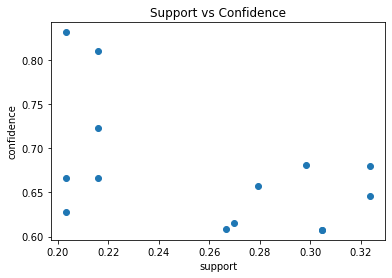

In [16]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

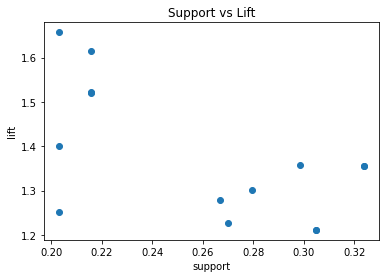

In [17]:
plt.scatter(rules['support'], rules['lift'])
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

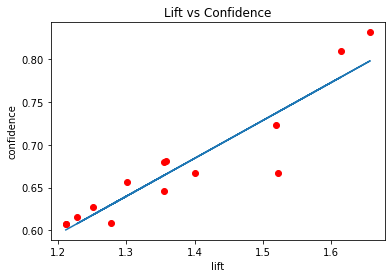

In [18]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
f = np.poly1d(fit)


plt.plot(rules['lift'], rules['confidence'], 'ro',
        rules['lift'], f(rules['lift']))
#plt.scatter(rules['lift'], rules['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Lift vs Confidence')
plt.show()